In [1]:
# Importing the libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import preprocessing,metrics,ensemble,svm,neighbors

In [2]:
# Reading the training dataset

X = pd.read_csv('train.csv')
X.drop(columns=['Name','Ticket','PassengerId','Cabin'],inplace=True)
X.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [3]:
# Splitting into features and labels

y = X.pop('Survived')
y.head()


original_cols = X.columns

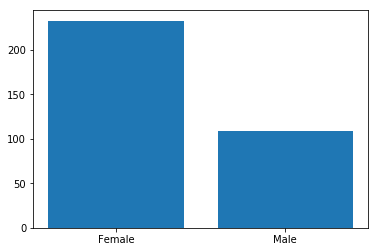

In [4]:
# Plotting Survival vs Sex graph

b = X.Sex[ y == 1].value_counts()

plt.bar(['Female','Male'],b)
plt.show()

In [5]:
# Removing Dummies

columns = ['Sex','Embarked']
for column in columns:
    dum = pd.get_dummies(X[column],prefix=column,prefix_sep="_")
    X = pd.concat([X,dum],axis=1)
    X.drop(columns=[column],inplace=True)
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [6]:
# Handle Missing Data

cols = X.columns

for col in cols:
    if X[col].isna().any() or X[col].isnull().any():
        X[col] = X[col].fillna(X[col].mean())
        
for col in cols:
    if X[col].isna().any() or X[col].isnull().any():
        print col

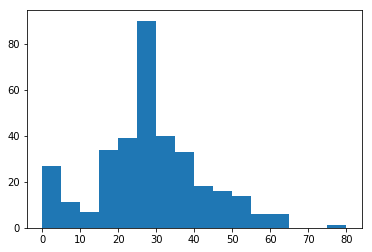

In [7]:
# Plotting Survival vs Age graph

b = range(int(X.Age.min()),int(X.Age.max()+1),5)

plt.hist(X.Age[ y == 1 ],bins=b,histtype='bar')
plt.show()

In [8]:
#Training the classifier

cls = svm.SVC(random_state=0,C=100)
cls.fit(X,y)
cls.score(X,y)*100

96.18406285072952

In [9]:
# Scores

pred = cls.predict(X)

print "Support Vector Classifier",cls.score(X,y)*100

print "Accuracy Score",metrics.accuracy_score(y,pred)*100
print "F1 Score",metrics.f1_score(y,pred)*100
print 'roc_auc_score',metrics.roc_auc_score(y,pred)*100
print "Recall Score",metrics.recall_score(y,pred)*100

Support Vector Classifier 96.18406285072952
Accuracy Score 96.18406285072952
F1 Score 94.89489489489489
roc_auc_score 95.4702329594478
Recall Score 92.39766081871345
